# running pipeline 2

10/31/23 creation

The purpose of this file is to now run the pipeline, but also to  that has been updated. It now has the files saved so you can load it

In addition, the utils has been changed to use the dataloader class to simply get all the information instead of defining all of them then taking all the 

And CV now is able to handle the use of neural networks

Finally, a github was created to ease the use of all of these tools, and keep track of versions

In [1]:
#load in all the necessary steps

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import torch
import torch.nn as nn
import pytorch_lightning as pl
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from pytorch_lightning import seed_everything

seed_everything(42)


from utils import *
from sklearn.metrics import mean_squared_error

dataloader = LoadData(impute='KNN',load = True)
cv = CV(dataloader)

Seed set to 42


In [2]:
#ran xgboost separately

cv.load_file('XGB.npy')

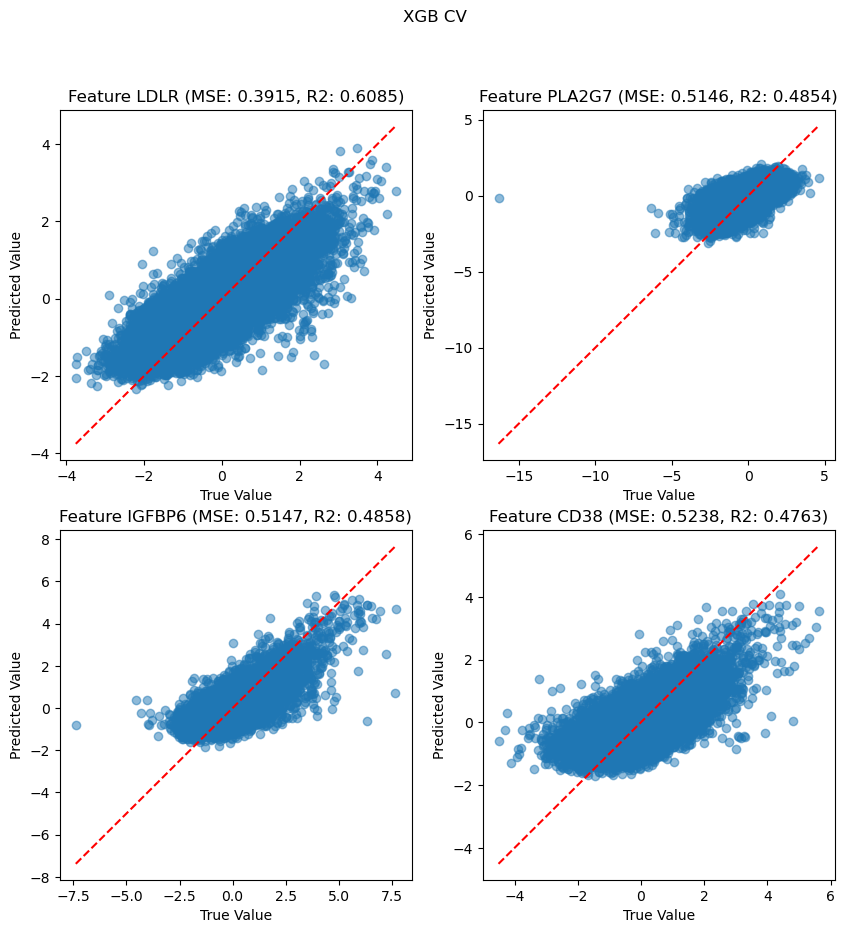

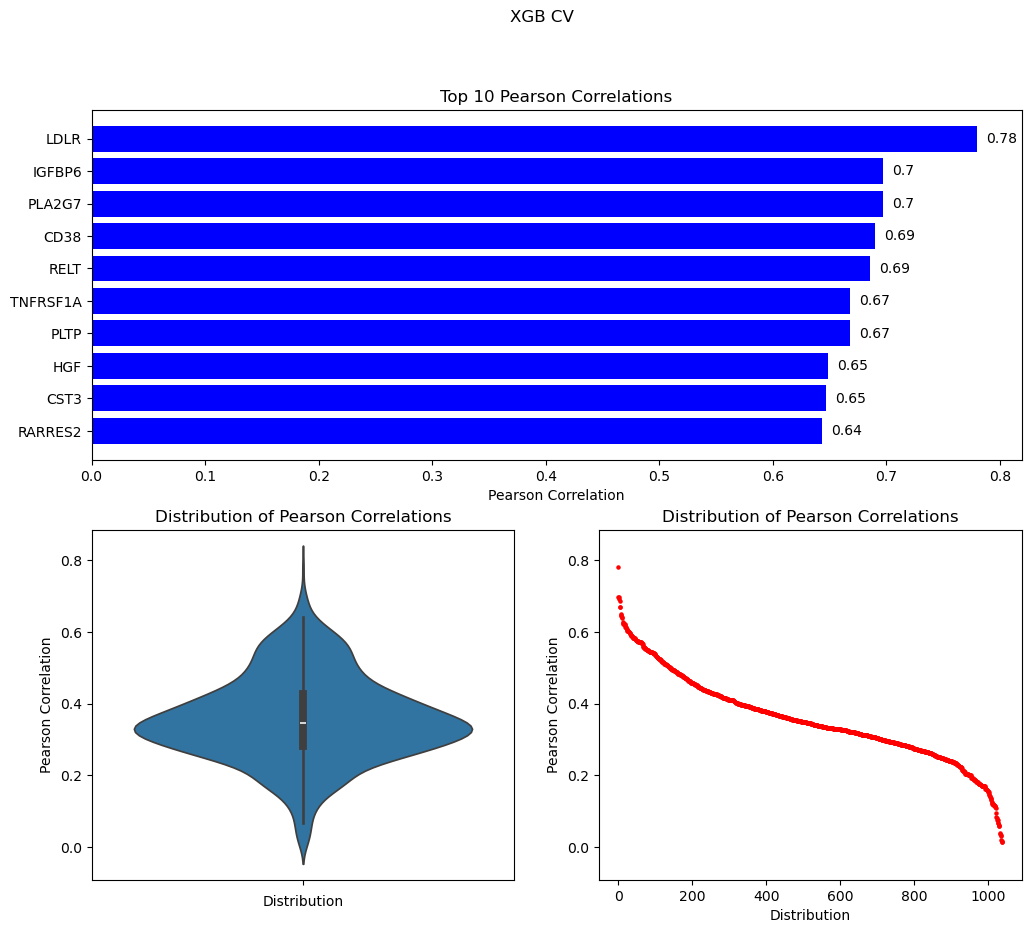

In [3]:
fig,axs = cv.idx_plot(feature_list = np.argsort(mean_squared_error(cv.prot, cv.predict, multioutput='raw_values'))[:4])
fig.suptitle('XGB CV')
plt.show(fig)

fig,axs = cv.pred_summary_plot()
fig.suptitle('XGB CV')
plt.show(fig)

Training Folds:   0%|          | 0/5 [00:00<?, ?it/s]

/home/sat4017/miniforge3/envs/prot_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/sat4017/miniforge3/envs/prot_torch/lib/python3 ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/sat4017/miniforge3/envs/prot_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/sat4017/miniforge3/envs/prot_torch/lib/python3 ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name   | Type       | Params
--------------------------------------
0 | layers | 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]


Predicting: |          | 0/? [00:00<?, ?it/s]

Training Folds:  20%|██        | 1/5 [00:07<00:28,  7.01s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 924 K 
--------------------------------------
924 K     Trainable params
0         Non-trainable params
924 K     Total params
3.699     Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Training Folds:  40%|████      | 2/5 [00:11<00:15,  5.31s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 924 K 
-------

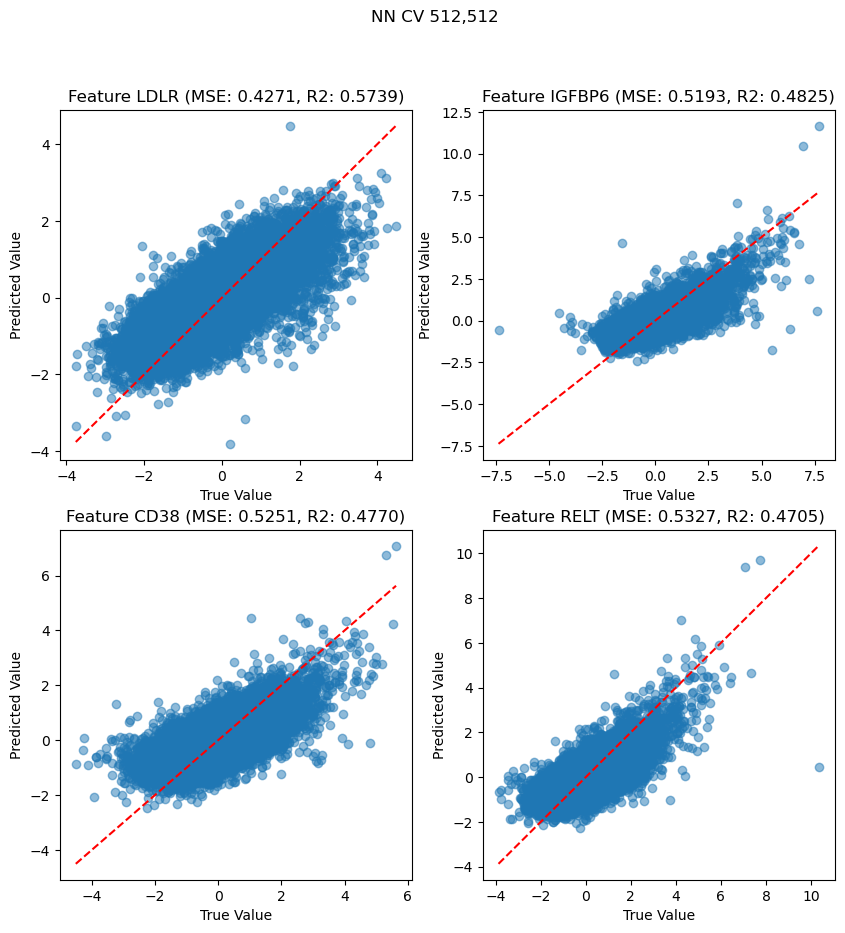

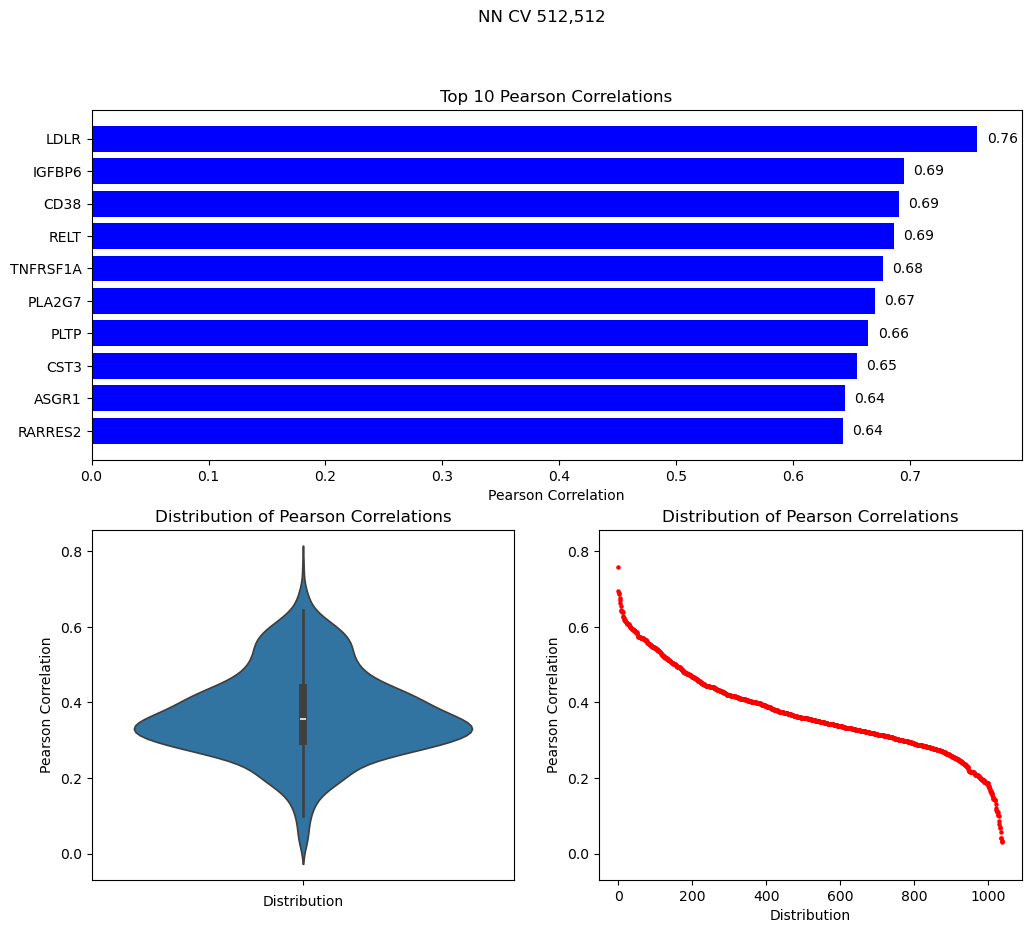

In [2]:
#and now we run some neural networks

cv.train_loop_pl()
#now plot
fig,axs = cv.idx_plot(feature_list = np.argsort(mean_squared_error(cv.prot, cv.predict, multioutput='raw_values'))[:4])
fig.suptitle('NN CV 512,512')
plt.show(fig)

fig,axs = cv.pred_summary_plot()
fig.suptitle('NN CV 512,512')
plt.show(fig)

Training Folds:   0%|          | 0/5 [00:00<?, ?it/s]/home/sat4017/miniforge3/envs/prot_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/sat4017/miniforge3/envs/prot_torch/lib/python3 ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 5.0 M 
--------------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
19.864    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]


Predicting: |          | 0/? [00:00<?, ?it/s]

Training Folds:  20%|██        | 1/5 [00:07<00:30,  7.70s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 5.0 M 
--------------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
19.864    Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Training Folds:  40%|████      | 2/5 [00:13<00:19,  6.39s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 5.0 M 
-------

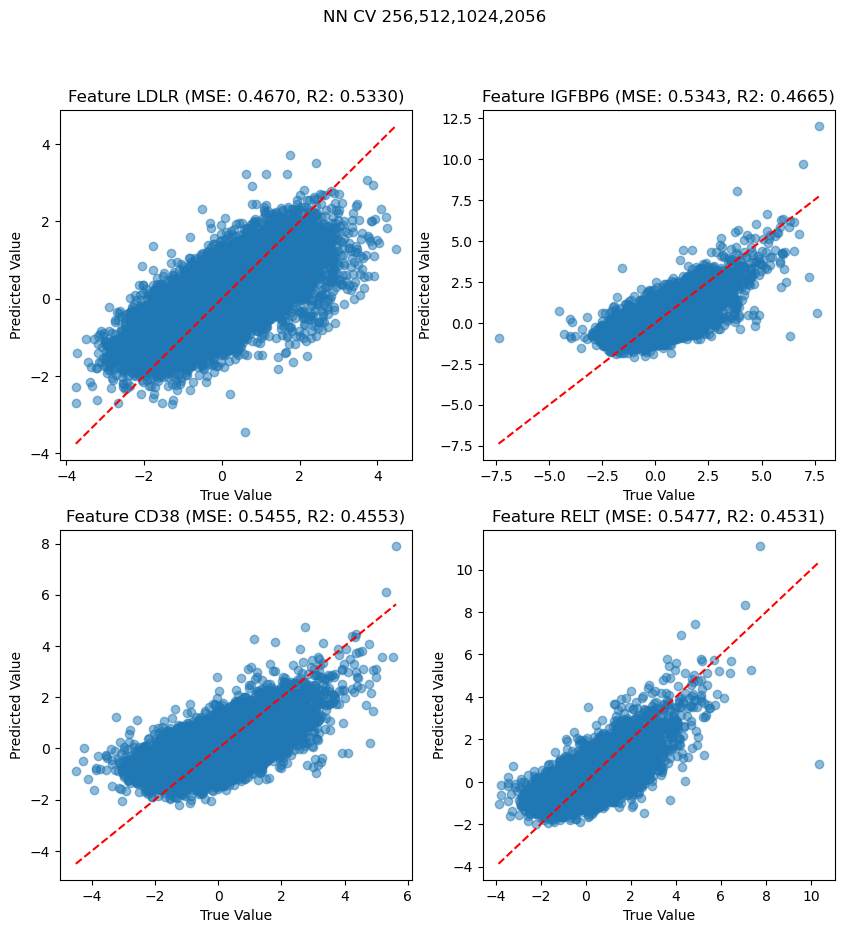

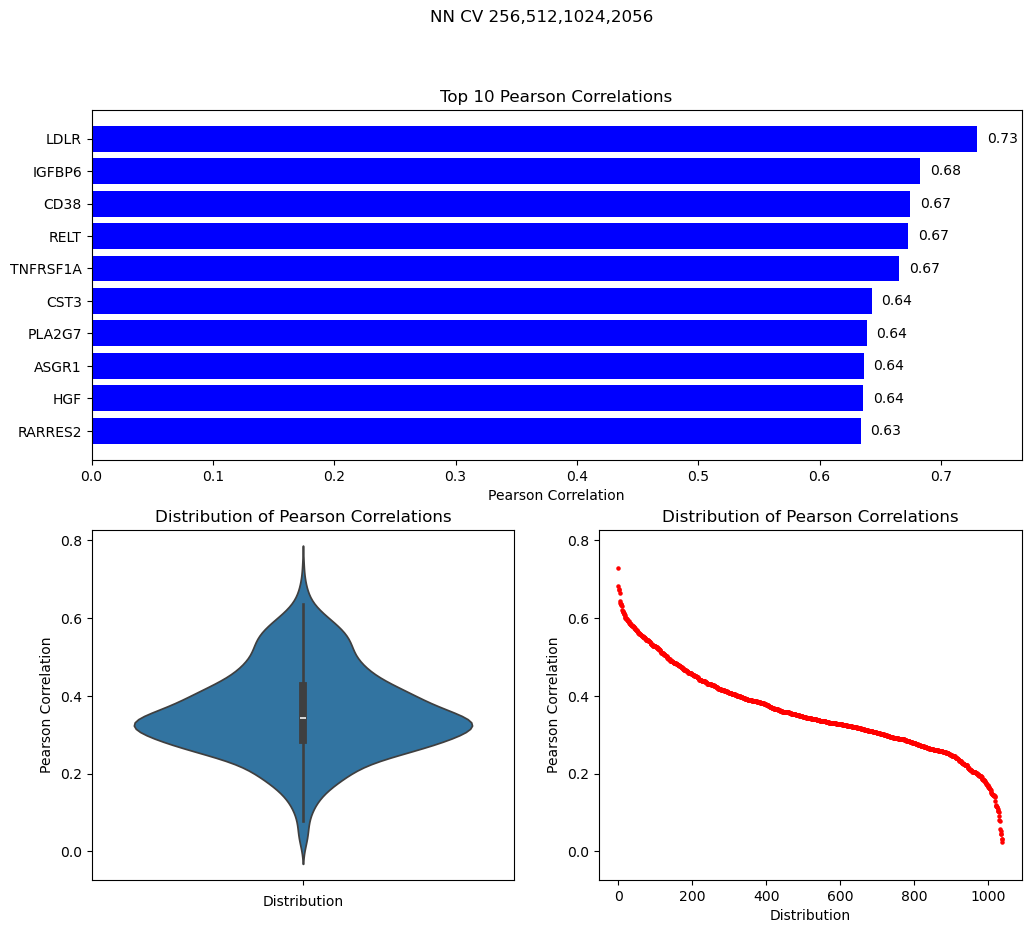

In [3]:
custom_layers = custom_layers = nn.Sequential(
    nn.Linear(251, 256),
    nn.ReLU(),
    nn.Linear(256, 512),
    nn.ReLU(),
    nn.Linear(512, 1024),
    nn.ReLU(),
    nn.Linear(1024, 2056),
    nn.ReLU(),
    nn.Linear(2056, 1039)
)

#now predict again
cv.train_loop_pl(custom_layers = custom_layers)
#now plot
fig,axs = cv.idx_plot(feature_list = np.argsort(mean_squared_error(cv.prot, cv.predict, multioutput='raw_values'))[:4])
fig.suptitle('NN CV 256,512,1024,2056')
plt.show(fig)

fig,axs = cv.pred_summary_plot()
fig.suptitle('NN CV 256,512,1024,2056')
plt.show(fig)

Training Folds:   0%|          | 0/5 [00:00<?, ?it/s]/home/sat4017/miniforge3/envs/prot_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/sat4017/miniforge3/envs/prot_torch/lib/python3 ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 5.0 M 
--------------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
19.864    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]


Predicting: |          | 0/? [00:00<?, ?it/s]

Training Folds:  20%|██        | 1/5 [00:08<00:32,  8.22s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 5.0 M 
--------------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
19.864    Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Training Folds:  40%|████      | 2/5 [00:13<00:20,  6.76s/it]GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 5.0 M 
-------

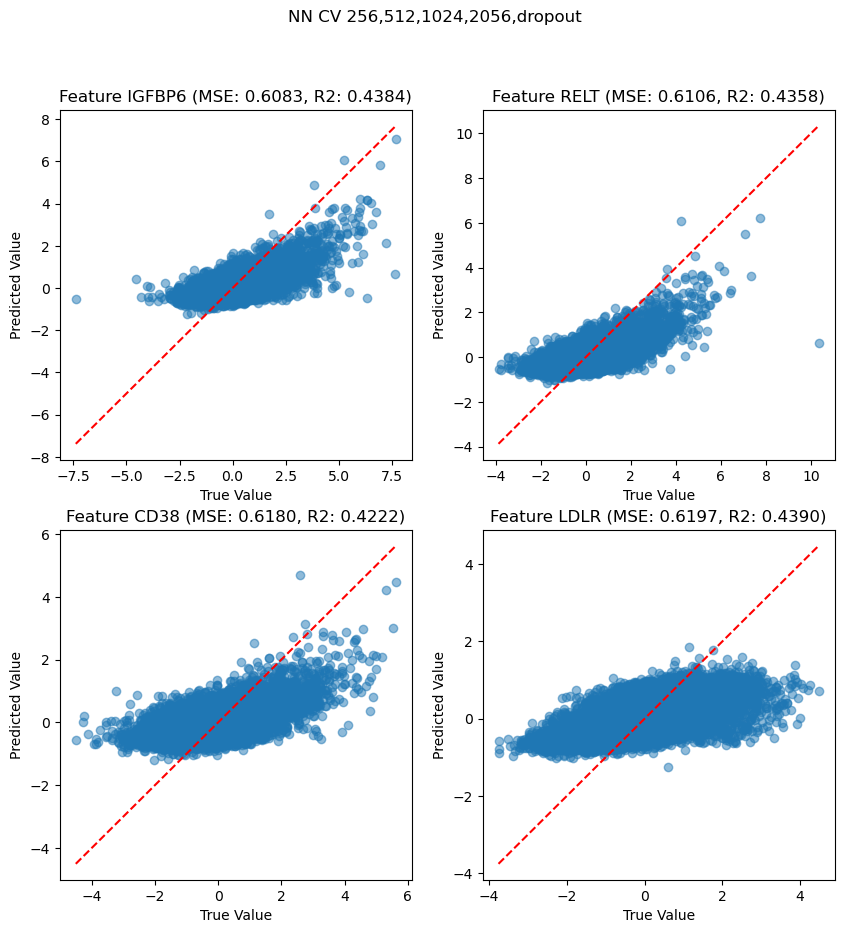

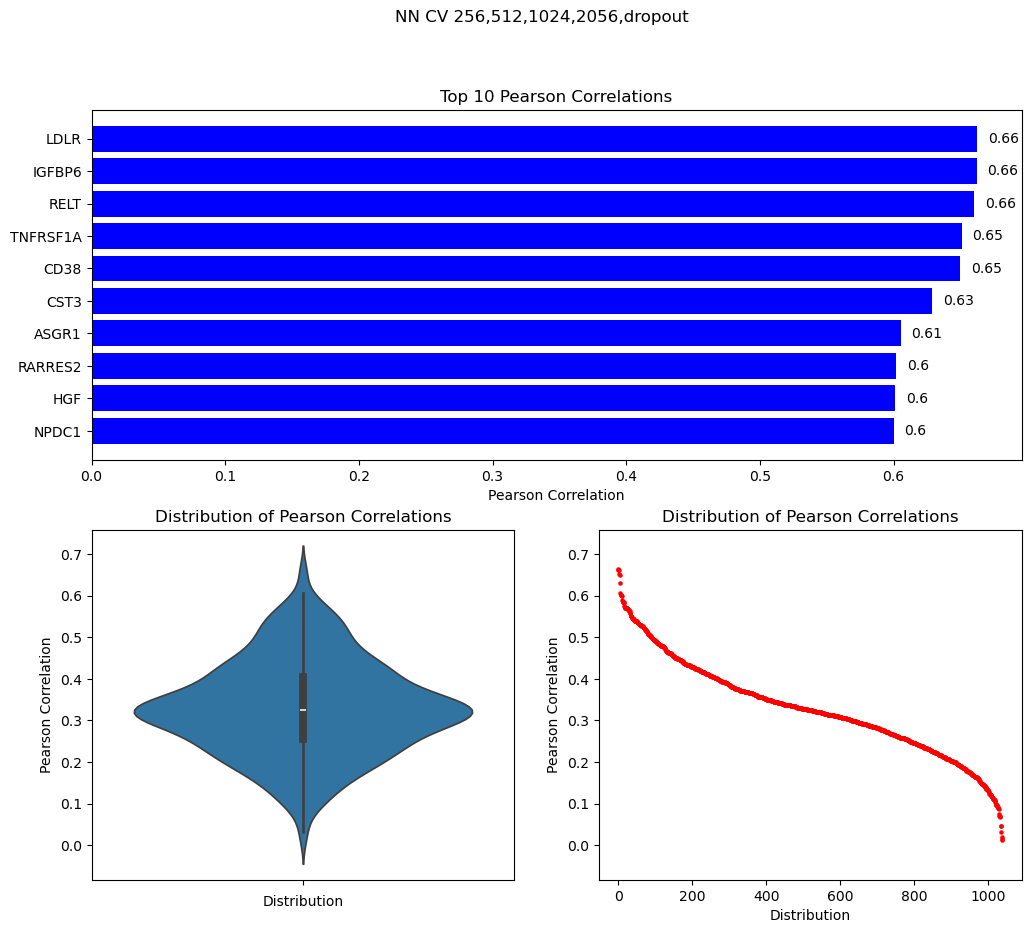

In [4]:
#now define custom layers to have like droput
custom_layers = nn.Sequential(
    nn.Linear(251, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 2056),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(2056, 1039)
)

#now predict again
cv.train_loop_pl(custom_layers = custom_layers)
#now plot
fig,axs = cv.idx_plot(feature_list = np.argsort(mean_squared_error(cv.prot, cv.predict, multioutput='raw_values'))[:4])
fig.suptitle('NN CV 256,512,1024,2056,dropout')
plt.show(fig)

fig,axs = cv.pred_summary_plot()
fig.suptitle('NN CV 256,512,1024,2056,dropout')
plt.show(fig)

In [5]:
# now let's do a CNN
#had to define a CNN net for this
custom_layers = nn.Sequential(
    nn.Conv1d(1, 16, 3),
    nn.ReLU(),
    nn.MaxPool1d(2),
    nn.Conv1d(16, 32, 3),
    nn.ReLU(),
    nn.MaxPool1d(2),
    nn.Conv1d(32, 64, 3),
    nn.ReLU(),
    nn.MaxPool1d(2),
    nn.Flatten(),
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.Linear(128, 256),
    nn.ReLU(),
    nn.Linear(256, 512),
    nn.ReLU(),
    nn.Linear(512, 1024),
    nn.ReLU(),
    nn.Linear(1024, 2056),
    nn.ReLU(),
    nn.Linear(2056, 1039)
)

#now predict again
cv.train_loop_pl(custom_layers = custom_layers)
#now plot
fig,axs = cv.idx_plot(feature_list = np.argsort(mean_squared_error(cv.prot, cv.predict, multioutput='raw_values'))[:4])
fig.suptitle('CNN CV 256,512,1024,2056,dropout')
plt.show(fig)

fig,axs = cv.pred_summary_plot()
fig.suptitle('CNN CV 256,512,1024,2056,dropout')
plt.show(fig)

#ccould potentially try this, but this seems useless, let's instead learn about transformers

Training Folds:   0%|          | 0/5 [00:00<?, ?it/s]/home/sat4017/miniforge3/envs/prot_torch/lib/python3.11/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/sat4017/miniforge3/envs/prot_torch/lib/python3 ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]

  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 5.0 M 
--------------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
19.803    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training Folds:   0%|          | 0/5 [00:00<?, ?it/s]


RuntimeError: Given groups=1, weight of size [16, 1, 3], expected input[1, 128, 251] to have 1 channels, but got 128 channels instead